In [3]:
%load_ext autoreload
%autoreload 2 

from jax import numpy as jnp
import jax
import diffrax
import astrodynx as adx
from matplotlib import pyplot as plt

# jax.config.update("jax_enable_x64", True)
jax.devices()

[CudaDevice(id=0), CudaDevice(id=1)]

solution steps: 100
ts shape: (68,)


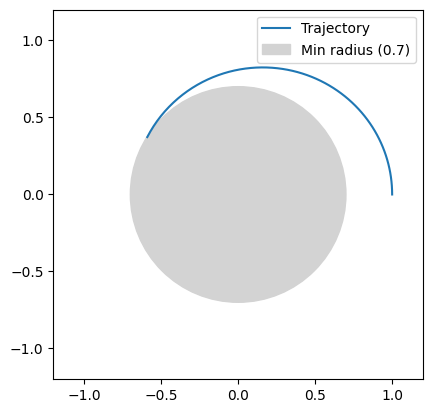

In [4]:
def vector_field(t, x, args):
    acc = adx.gravity.point_mass_grav(t, x, args)
    acc += adx.gravity.j2_acc(t, x, args)
    return jnp.concatenate([x[3:], acc])


args = {"mu": 1.0, "rmin": 0.7, "J2": 1e-6, "R_eq": 1.0}
t1 = 3.14
ts = jnp.linspace(0, t1, 100)
x0 = jnp.array([1.0, 0.0, 0.0, 0.0, 0.9, 0.0])
saveat = diffrax.SaveAt(steps=True)
event = diffrax.Event(adx.events.radius_toolow)
term = diffrax.ODETerm(vector_field)
sol = adx.spprop_steps(term, x0, t1, ts, args=args, event=event)

ts = jax.device_get(sol.ts[jnp.isfinite(sol.ts)])
print(f"solution steps: {sol.ts.size}")
print(f"ts shape: {ts.shape}")

fig, ax = plt.subplots()
ax.plot(sol.ys[:, 0], sol.ys[:, 1], label="Trajectory")
circle = plt.Circle(
    (0, 0), radius=args["rmin"], color="lightgray", label=f"Min radius ({args['rmin']})"
)
ax.add_patch(circle)
ax.set_aspect("equal")
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.legend()
plt.show()